In [1]:
import pandas as pd

In [8]:
keep_cols = ['scientificName',
        'decimalLatitude',
        'decimalLongitude',
        'coordinateUncertaintyInMeters',
        'continent',
        'stateProvince',
        'year',
        'month',
        'day',
        'eventDate',
        'startDayOfYear',
        'endDayOfYear',
        'issues',
        'modified',
        'lastInterpreted',
        'isSequenced',
        'isInCluster',
        'countryCode',
        'gbifRegion',
        'country',
        'county',
        'municipality',
        'locality',
        'institutionCode',
        'datasetName',
        'identificationVerificationStatus']

In [9]:
df_gbif = pd.read_csv('../data/df_enoki_gbfi.csv')[keep_cols]

/var/folders/y4/vf4m1vd95l97ysrydp39y6vw0000gn/T/ipykernel_13418/3154649525.py:1: DtypeWarning: Columns (112,113,115,129,146,149,150,155,158,159,160,164,169,170,171,172,173,174,175,176,177,178,181,182,183,184,185,187,188,189,192,193,194,195,196,197,198,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gbif = pd.read_csv('../data/df_enoki_gbfi.csv')[keep_cols]


In [14]:
df_gbif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   scientificName                    29965 non-null  object 
 1   decimalLatitude                   29965 non-null  float64
 2   decimalLongitude                  29965 non-null  float64
 3   coordinateUncertaintyInMeters     25577 non-null  float64
 4   continent                         29944 non-null  object 
 5   stateProvince                     24140 non-null  object 
 6   year                              29707 non-null  float64
 7   month                             29077 non-null  float64
 8   day                               28766 non-null  float64
 9   eventDate                         29732 non-null  object 
 10  startDayOfYear                    28940 non-null  float64
 11  endDayOfYear                      28940 non-null  float64
 12  issu

In [ ]:
df_gbif.scientificName.value_counts() # sacar los q no van

scientificName
Flammulina velutipes (Curtis) Singer                 21376
Flammulina velutipes var. velutipes                   4542
Flammulina velutipes (Curtis) P.Karst.                3777
Collybia velutipes (Curtis) P.Kumm.                    166
Flammulina velutipes var. lactea (Quél.) Bas            38
Flammulina velutipes f. velutipes                       26
Agaricus velutipes Curtis                               21
Collybia veluticeps Rea                                 11
Agaricus nigripes Bull., 1788                            4
Flammulina velutipes f. pygmaea Michael & Henning        3
Myxocollybia velutipes (Curtis) Singer                   1
Name: count, dtype: int64

In [ ]:
df_gbif.coordinateUncertaintyInMeters.describe() # hay algunos con valores altos 
# se podrian filtrar por algun valor

count    2.557700e+04
mean     2.825396e+03
std      2.545918e+04
min      5.000000e-01
25%      2.500000e+01
50%      2.500000e+02
75%      3.535000e+03
max      2.447316e+06
Name: coordinateUncertaintyInMeters, dtype: float64

<Axes: >

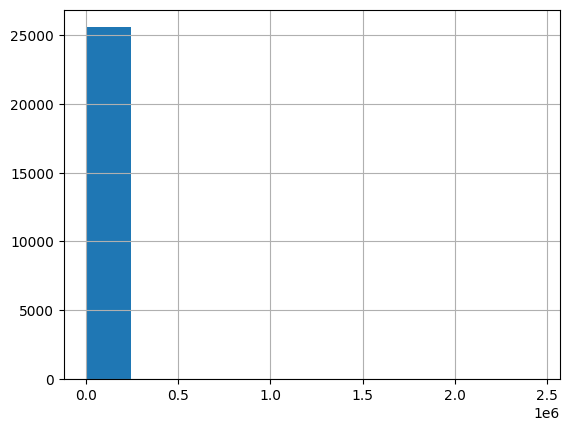

In [13]:
df_gbif.coordinateUncertaintyInMeters.hist()

In [16]:
df_gbif.continent.value_counts()

continent
EUROPE           21962
NORTH_AMERICA     4971
OCEANIA           2352
ASIA               441
SOUTH_AMERICA      213
AFRICA               3
ANTARCTICA           2
Name: count, dtype: int64

In [17]:
df_gbif.country.value_counts()

country
Sweden                                                  5274
United Kingdom of Great Britain and Northern Ireland    4475
United States of America                                4198
Denmark                                                 2442
Netherlands                                             2157
                                                        ... 
Kenya                                                      1
Brazil                                                     1
Tajikistan                                                 1
Latvia                                                     1
Venezuela (Bolivarian Republic of)                         1
Name: count, Length: 62, dtype: int64

In [ ]:
df_gbif_arg = df_gbif[df_gbif.country == 'Argentina']

In [22]:
df_gbif_arg.stateProvince.isna().sum()

np.int64(8)

In [19]:
df_gbif_arg.stateProvince.value_counts()

stateProvince
Buenos Aires              70
Ciudad de Buenos Aires    28
Santa Fe                   8
Chubut                     6
Entre Ríos                 5
Río Negro                  4
Córdoba                    3
Neuquén                    2
Jujuy                      2
Rio Negro                  1
Name: count, dtype: int64

In [ ]:
df_gbif_arg.locality.isna().sum()

np.int64(127)

In [ ]:
df_gbif_arg.locality.value_counts() #locality no va para arg

locality
Llavallol, Bosque De Santa Catalina                                     2
Esquel, Parque Nacional De Los Alerces                                  2
Esquel, Parque Nacional De Los Alerces, East Shore of Lago Menendez.    2
Esquel, Parque Nacional De Los Alerces, South Shore of Lago Verde.      1
Llavallol, Bosque Des Santa Catalina                                    1
Llao Llao, Trail From Municipal Park.                                   1
Esquel                                                                  1
Name: count, dtype: int64

In [46]:
df_gbif_arg.county.value_counts()

county
Futaleufu          6
Lomas De Zamora    3
Rio Negro          1
Name: count, dtype: int64

In [47]:
df_gbif_arg.municipality.value_counts()

municipality
Esquel       6
Llavallol    3
Llao Llao    1
Name: count, dtype: int64

In [ ]:
df_gbif.eventDate.isna().sum() # ver si hay otra fecha en el dataset

np.int64(233)

In [ ]:
df_gbif.eventDate # no todas en el mismo formato

0                               2025-01-03
1                               2025-01-02
2                               2025-01-05
3                               2025-01-01
4        2025-01-02T11:30/2025-01-02T16:00
                       ...                
29960                                  NaN
29961                                  NaN
29962                                  NaN
29963                                  NaN
29964                            2005/2006
Name: eventDate, Length: 29965, dtype: object

In [ ]:
df_gbif.year.describe() # el min esta nmal, filtrar por fechas

count    29707.000000
mean      2009.920288
std         18.304823
min       1789.000000
25%       2004.000000
50%       2016.000000
75%       2021.000000
max       2025.000000
Name: year, dtype: float64

In [36]:
df_gbif.year.value_counts()

year
2020.0    2000
2021.0    1992
2023.0    1922
2024.0    1793
2022.0    1740
          ... 
1880.0       1
1856.0       1
1863.0       1
1844.0       1
1789.0       1
Name: count, Length: 155, dtype: int64

<Axes: >

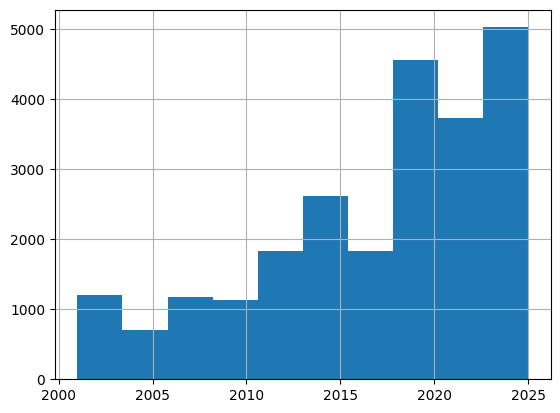

In [35]:
df_gbif[df_gbif.year > 2000].year.hist()

In [32]:
df_gbif.year.max()

np.float64(2025.0)

In [ ]:
df_gbif.startDayOfYear.describe() # no se que es

count    28940.000000
mean       190.248134
std        134.236916
min          1.000000
25%         45.000000
50%        233.000000
75%        317.000000
max        366.000000
Name: startDayOfYear, dtype: float64

In [39]:
df_gbif.endDayOfYear.describe() # no se que es

count    28940.000000
mean       191.415999
std        134.271437
min          1.000000
25%         46.000000
50%        238.000000
75%        318.000000
max        366.000000
Name: endDayOfYear, dtype: float64

In [ ]:
df_gbif.issues.value_counts() # ver que son y si conviene sacar alguna

issues
[]                                                                                                                                                                          7458
['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM_COORDINATES', 'TAXON_ID_NOT_FOUND']                                                                                          5819
['CONTINENT_DERIVED_FROM_COORDINATES', 'TAXON_CONCEPT_ID_NOT_FOUND', 'TAXON_ID_NOT_FOUND']                                                                                  4259
['COORDINATE_ROUNDED', 'GEODETIC_DATUM_ASSUMED_WGS84', 'CONTINENT_DERIVED_FROM_COORDINATES']                                                                                2776
['TAXON_ID_NOT_FOUND']                                                                                                                                                      1677
                                                                                                            

In [ ]:
df_gbif.modified.describe() 
# ver que es, si convienefiltrar, comparar con event date

count                             20036
unique                            14006
top       2017-05-08T09:58:41.000+00:00
freq                               1194
Name: modified, dtype: object

In [ ]:
df_gbif.lastInterpreted # same

0        2025-11-07T13:47:29.291+00:00
1        2025-11-07T13:47:31.046+00:00
2        2025-12-11T21:23:51.352+00:00
3        2025-12-11T21:18:04.474+00:00
4        2025-12-11T21:23:54.758+00:00
                     ...              
29960    2025-11-14T12:53:06.999+00:00
29961    2025-11-14T12:53:06.871+00:00
29962    2025-11-14T12:53:07.849+00:00
29963    2025-11-14T12:53:08.186+00:00
29964    2025-11-25T14:53:28.323+00:00
Name: lastInterpreted, Length: 29965, dtype: object

In [ ]:
df_gbif.isSequenced.value_counts() # ver q es

isSequenced
False    29832
True       133
Name: count, dtype: int64

In [45]:
df_gbif.isInCluster.value_counts() # ver q es

isInCluster
False    29426
True       539
Name: count, dtype: int64

In [48]:
df_gbif.institutionCode.value_counts()

institutionCode
iNaturalist          6259
SLU Artdatabanken    5191
BMS                  2387
nsnf                 1716
NABU|naturgucker     1112
                     ... 
LSUM                    1
CLEMS                   1
BRU                     1
ILL                     1
PH                      1
Name: count, Length: 183, dtype: int64

In [49]:
df_gbif.datasetName.value_counts()

datasetName
iNaturalist research-grade observations                     6259
Artportalen                                                 5191
The Atlas of Finnish Fungi                                   212
Fungi                                                         72
FungaCAT: Banco de datos de los hongos de Cataluña            57
                                                            ... 
Base de datos de hongos                                        1
Centro de Estudios Micológicos Asturianos: Herbarium ERD       1
Fungi specimen and observation data G. Marson                  1
Exsiccatae, fungi                                              1
Herbarium                                                      1
Name: count, Length: 94, dtype: int64

In [ ]:
df_gbif.identificationVerificationStatus.value_counts() # ver si conviene filtrar

identificationVerificationStatus
Unvalidated                                                                                                                                 5189
Unconfirmed - plausible                                                                                                                     2530
Approved | Expert | Evidence                                                                                                                1869
Valid                                                                                                                                       1706
Accepted - considered correct                                                                                                                760
Accepted - correct                                                                                                                           608
Non réalisable                                                                                   